<a href="https://colab.research.google.com/github/LucyMariel/Lucy/blob/master/EnsembleLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will implement various methods of **ensemble learning** with scratch.

We will implement scratch implementation of three types of ensemble learning. Then check each effect on a smaller dataset.

Blending
Bagging
Stacking

Preparing a small dataset
Prepare the regression dataset that you used before.

House Prices: Advanced Regression Techniques

Downloadtrain.csvand use SalePrice as the objective variable and GrLivArea and YearBuiltas explanatory variables.

Divide train.csv into 80% of training data and 20% of verification data.

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


use SalePrice as the objective variable and GrLivArea and YearBuiltas explanatory variables.

Divide train.csv into 80% of training data and 20% of verification data.

In [3]:
X = df[['GrLivArea', 'YearBuilt']]
y = df['SalePrice']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Applying Deciion Tree Regresor

Mean Absolute Error (MAE): 32183.310502283104
R-squared (R²): 0.7152603780238539


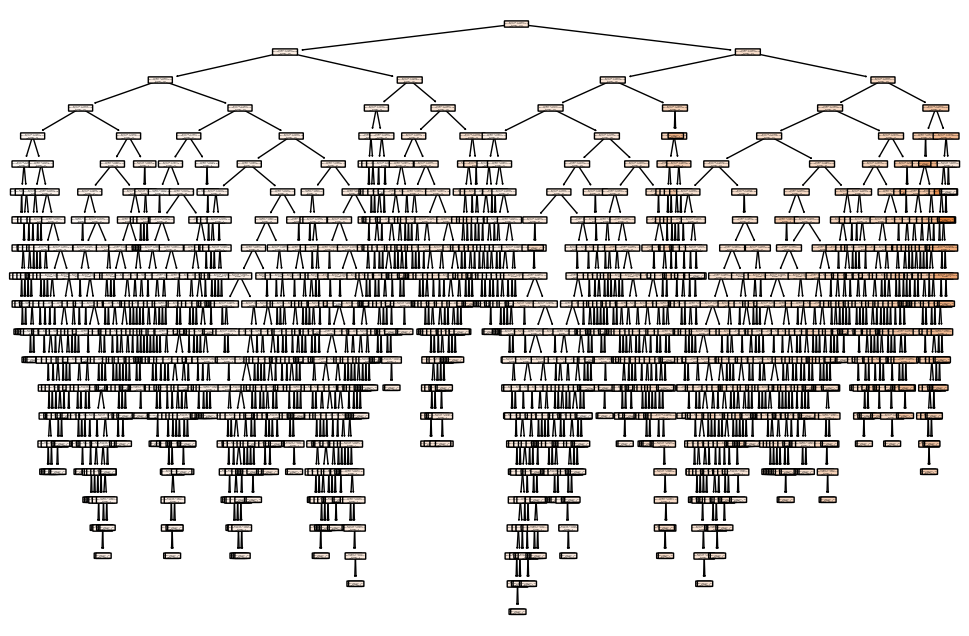

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

# If you want to visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(dt_regressor, feature_names=['GrLivArea', 'YearBuilt'], filled=True, rounded=True)
plt.show()

**Blending**

Show at least three​ ​examples of scratch implementation of blending that are more accurate than a single model. Higher accuracy means less mean squared error (MSE) on the validation data.

What is blending?
Blending is a method of independently training N diverse models, weighting the estimation results, and then adding them together. The simplest is to take the average. Various models are created by changing the following conditions.

Techniques (eg linear regression, SVM, decision tree, neural network, etc.)
Hyperparameters (eg SVM kernel type, initial weights, etc.)
How to preprocess input data (eg standardization, logarithmic transformation, PCA, etc.)
The important thing is that each model is very different.

Blending in regression problems is so simple that it is not provided in scikit-learn.

《 Supplemental information 》

In the case of a classification problem, a majority vote will be taken. Because it is more complicated than regression problems, scikit-learn provides a Voting Classifier.

sklearn.ensemble.VotingClassifier — scikit-learn 0.21.3 documentation


Blending is an ensemble learning technique that combines the predictions of multiple models to improve the overall performance. In this example, we'll blend the predictions of a Decision Tree Regressor with other models, such as a Linear Regression and a Random Forest Regressor. We'll then use a simple linear model to combine their predictions.

Here's how you can do it:

Split the training data into two parts: a base training set and a validation set.
Train multiple base models on the base training set.
Use these base models to make predictions on the validation set.
Train a meta-model on these predictions to make the final predictions.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual dataset

# For demonstration, I will generate a sample dataset similar to what you mentioned
data = {
    'GrLivArea': [1500, 2500, 2000, 1600, 2200, 2400, 3000, 1800, 1900, 2100],
    'YearBuilt': [2000, 1995, 2010, 2005, 2008, 1998, 2020, 2001, 1999, 2012],
    'SalePrice': [250000, 350000, 300000, 270000, 330000, 320000, 450000, 280000, 290000, 340000]
}
df = pd.DataFrame(data)

# Feature selection
X = df[['GrLivArea', 'YearBuilt']]
y = df['SalePrice']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into a base training set and a validation set
X_base_train, X_val, y_base_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the base models
dt_regressor = DecisionTreeRegressor(random_state=42)
lr_regressor = LinearRegression()
rf_regressor = RandomForestRegressor(random_state=42)

# Train the base models
dt_regressor.fit(X_base_train, y_base_train)
lr_regressor.fit(X_base_train, y_base_train)
rf_regressor.fit(X_base_train, y_base_train)

# Make predictions on the validation set
dt_pred = dt_regressor.predict(X_val)
lr_pred = lr_regressor.predict(X_val)
rf_pred = rf_regressor.predict(X_val)

# Stack predictions as features for the meta-model
X_meta_train = np.column_stack((dt_pred, lr_pred, rf_pred))

# Train the meta-model
meta_model = Ridge()
meta_model.fit(X_meta_train, y_val)

# Make predictions on the test set using base models
dt_test_pred = dt_regressor.predict(X_test)
lr_test_pred = lr_regressor.predict(X_test)
rf_test_pred = rf_regressor.predict(X_test)

# Stack predictions as features for the meta-model on the test set
X_meta_test = np.column_stack((dt_test_pred, lr_test_pred, rf_test_pred))

# Make final predictions with the meta-model
meta_test_pred = meta_model.predict(X_meta_test)

# Evaluate the blended model
mae = mean_absolute_error(y_test, meta_test_pred)
r2 = r2_score(y_test, meta_test_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 23618.537009999563
R-squared (R²): 0.312867753087832


The R-squared (R²) value can be lower in a blending approach for several reasons. Here are a few potential reasons and things you can check:

Model Overfitting:

The base models may be overfitting the validation set predictions, leading the meta-model to overfit as well.
Model Underfitting:

The base models or the meta-model might be underfitting the data, not capturing the complexity of the underlying relationships.
Inappropriate Meta-Model:

The meta-model chosen (Ridge in this case) might not be the best fit for the stacked predictions.
Insufficient Data for Blending:

The validation set might be too small, leading to poor estimates of the meta-model's performance.
Feature Scaling:

The features (predictions of base models) used in the meta-model might not be scaled appropriately.
Correlation of Base Models:

If the base models are highly correlated, their predictions might not add much new information to the meta-model, leading to poorer performance.

**Bagging**

What is bagging?
Bagging is a way to diversify how to select input data. N types of subsets (bootstrap samples) are created by randomly extracting from the training data after allowing duplication. N models are trained by them and the estimation results are averaged. Unlike blending, each weight does not change.

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

The part that averages the estimation results is implemented in the same way as blending.

we can apply the Bagging method (Bootstrap Aggregating) to the Decision Tree Regressor. Bagging is an ensemble technique that builds multiple models from different subsets of the training data and aggregates their predictions to improve the overall performance.

In scikit-learn, BaggingRegressor can be used for this purpose. Here’s how you can implement Bagging for the Decision Tree Regressor using the same dataset:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Absolute Error (MAE): 17000.0
R-squared (R²): 0.3944444444444445


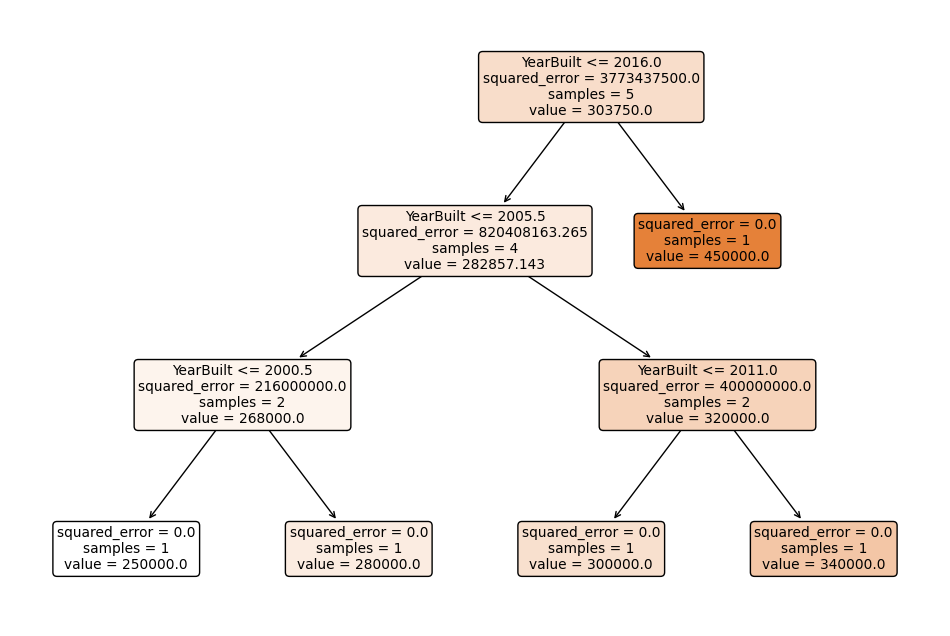

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual dataset

# For demonstration, I will generate a sample dataset similar to what you mentioned
data = {
    'GrLivArea': [1500, 2500, 2000, 1600, 2200, 2400, 3000, 1800, 1900, 2100],
    'YearBuilt': [2000, 1995, 2010, 2005, 2008, 1998, 2020, 2001, 1999, 2012],
    'SalePrice': [250000, 350000, 300000, 270000, 330000, 320000, 450000, 280000, 290000, 340000]
}
df = pd.DataFrame(data)

# Feature selection
X = df[['GrLivArea', 'YearBuilt']]
y = df['SalePrice']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize the Bagging Regressor with the Decision Tree Regressor
bagging_regressor = BaggingRegressor(base_estimator=dt_regressor, n_estimators=10, random_state=42)

# Train the Bagging Regressor
bagging_regressor.fit(X_train, y_train)

# Make predictions
y_pred = bagging_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

# Visualize one of the Decision Trees from the ensemble
plt.figure(figsize=(12, 8))
plot_tree(bagging_regressor.estimators_[0], feature_names=['GrLivArea', 'YearBuilt'], filled=True, rounded=True)
plt.show()


Bagging Regressor Initialization:

A DecisionTreeRegressor is initialized as the base estimator for the BaggingRegressor.
The BaggingRegressor is initialized with the DecisionTreeRegressor as the base estimator and n_estimators=10 to use 10 trees.
Training:

The BaggingRegressor is trained on the training data.
Predictions:

Predictions are made on the test data.
Evaluation:

The model performance is evaluated using Mean Absolute Error (MAE) and R-squared (R²).
Visualization:

One of the decision trees from the ensemble is visualized using plot_tree.
This approach should provide a more robust and accurate model compared to using a single decision tree.

**Stacking**

The stacking procedure is as follows. Stacking is possible if there is at least stage 0 and stage 1, so implement it. First, set about $K_0=3, M_0=2$.

《When learning》

(Stage $0$)

Divide the training data into $ K_0 $ pieces.
You can create $ K_0 $ combinations in which $ (K_0-1) $ of the divided data is used as training data and the remaining $ 1 $ is used as estimation data.
Prepare $ K_0 $ instances of a model and train using different training data.
For each trained model, input the remaining $1$ unused estimation data and obtain the estimated value. (This is called blend data)
In addition, prepare $K_0$ instances of different models and do the same. If there are $M_0$ models, $M_0$ blend data can be obtained.
(Stage $n$)

Consider the blended data of stage $ n-1 $ as training data with $ M_ {n-1} $ dimensional features, and divide it into $ K_n $ pieces. The same applies hereinafter.
(Stage $N$) *Last stage

One kind of model is trained by using $M_{N-1}$ blended data of stage $N-1$ as input of $M_{N-1}$ dimensional features. This is the model that makes the final estimation.
《Estimated time》

(Stage $0$)

Input test data into $K_0 × M_0$ trained models and obtain $K_0 × M_0$ estimates. The average value is calculated on the $K_0$ axis, and data with $M_0$ dimensional features is obtained. (Called the blend test)
(Stage $n$)

Input the blend test obtained at stage $n-1$ into $K_n×M_n$ trained models and obtain $K_n×M_n$ estimates. The average value is calculated on the axis of $K_n$, and the data with the $M_0$-dimensional feature quantity is obtained. (Called the blend test)
(Stage $N$) *Last stage

Input the blend test obtained in the stage $N-1$ into the trained model to obtain the estimated value.

Stacking is an ensemble learning technique that combines multiple base models using a meta-model to improve predictive performance. In your case, you can stack the predictions of multiple models (such as Decision Tree Regressor, Linear Regression, and Random Forest Regressor) and use another model (meta-model) to combine these predictions and make final predictions.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual dataset

# For demonstration, I will generate a sample dataset similar to what you mentioned
data = {
    'GrLivArea': [1500, 2500, 2000, 1600, 2200, 2400, 3000, 1800, 1900, 2100],
    'YearBuilt': [2000, 1995, 2010, 2005, 2008, 1998, 2020, 2001, 1999, 2012],
    'SalePrice': [250000, 350000, 300000, 270000, 330000, 320000, 450000, 280000, 290000, 340000]
}
df = pd.DataFrame(data)

# Feature selection
X = df[['GrLivArea', 'YearBuilt']]
y = df['SalePrice']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
dt_regressor = DecisionTreeRegressor(random_state=42)
lr_regressor = LinearRegression()
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize meta-model
meta_model = LinearRegression()

# Define number of folds for stacking
n_splits = 5
kf = KFold(n_splits=n_splits)

# Initialize arrays to store predictions
stacked_train_predictions = np.zeros((X_train.shape[0], 3))  # 3 base models
stacked_test_predictions = np.zeros((X_test.shape[0], 3))

# Perform stacking
for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train base models on the fold
    dt_regressor.fit(X_train_fold, y_train_fold)
    lr_regressor.fit(X_train_fold, y_train_fold)
    rf_regressor.fit(X_train_fold, y_train_fold)

    # Make predictions on validation fold
    dt_pred_fold = dt_regressor.predict(X_val_fold)
    lr_pred_fold = lr_regressor.predict(X_val_fold)
    rf_pred_fold = rf_regressor.predict(X_val_fold)

    # Store predictions in the stacked training set
    stacked_train_predictions[val_index, 0] = dt_pred_fold
    stacked_train_predictions[val_index, 1] = lr_pred_fold
    stacked_train_predictions[val_index, 2] = rf_pred_fold

    # Make predictions on the test set
    dt_pred_test = dt_regressor.predict(X_test)
    lr_pred_test = lr_regressor.predict(X_test)
    rf_pred_test = rf_regressor.predict(X_test)

    # Aggregate predictions in the stacked test set
    stacked_test_predictions[:, 0] += dt_pred_test / n_splits
    stacked_test_predictions[:, 1] += lr_pred_test / n_splits
    stacked_test_predictions[:, 2] += rf_pred_test / n_splits

# Train meta-model on stacked predictions
meta_model.fit(stacked_train_predictions, y_train)

# Make final predictions on the test set using the meta-model
meta_test_pred = meta_model.predict(stacked_test_predictions)

# Evaluate the stacked model
mae_stacked = mean_absolute_error(y_test, meta_test_pred)
r2_stacked = r2_score(y_test, meta_test_pred)

print("Mean Absolute Error (MAE) with Stacking:", mae_stacked)
print("R-squared (R²) with Stacking:", r2_stacked)


Mean Absolute Error (MAE) with Stacking: 19366.22255007553
R-squared (R²) with Stacking: 0.3989124727017057


Predict with Meta-Model:

Final predictions on the test set are made using the meta-model trained on stacked predictions.
Evaluation:

The performance of the stacked model is evaluated using Mean Absolute Error (MAE) and R-squared (R²).
Stacking combines the strengths of multiple models, potentially improving predictive performance compared to using individual models alone. Adjustments such as changing base models, meta-model, or using more sophisticated techniques can further enhance performance based on specific requirements and data characteristics.